In [1]:
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'Y')

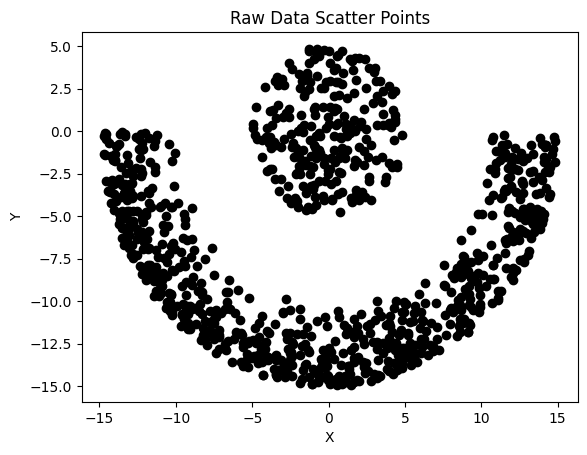

In [2]:
data = np.genfromtxt("cm_dataset_2.csv", delimiter=",")
k = 2   #number of clusters
random_initializations = 5
plt.scatter(data[:, 0], data[:, 1], c='black', label='Data Points')
plt.title('Raw Data Scatter Points')
plt.xlabel('X')
plt.ylabel('Y')

[[  8.6188 -11.048 ]
 [  4.0116 -11.44  ]]


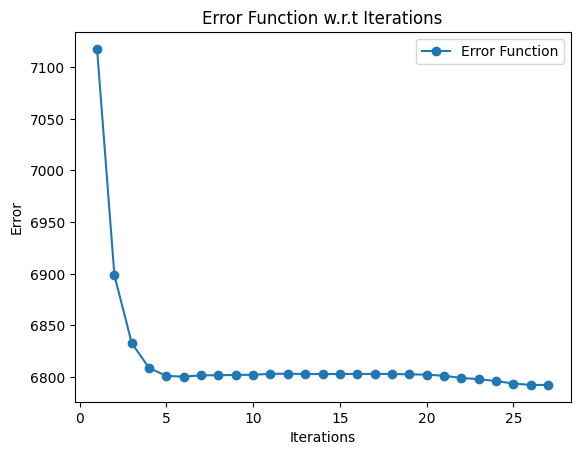

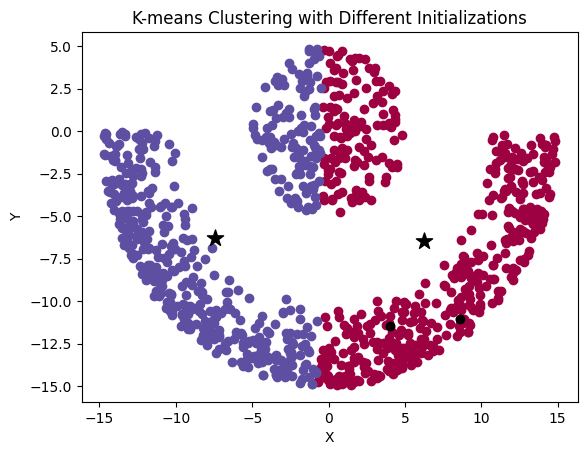

[[ 9.2318 -9.8675]
 [14.409  -3.8665]]


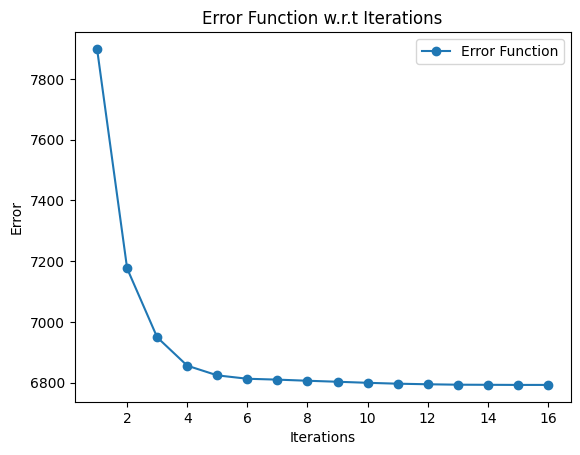

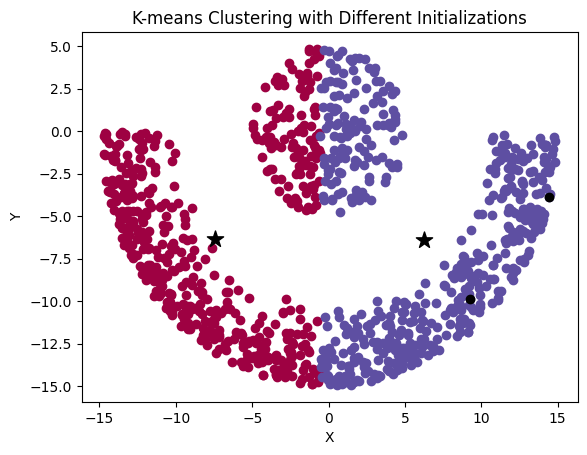

[[-10.431  -10.47  ]
 [ -4.5536 -11.313 ]]


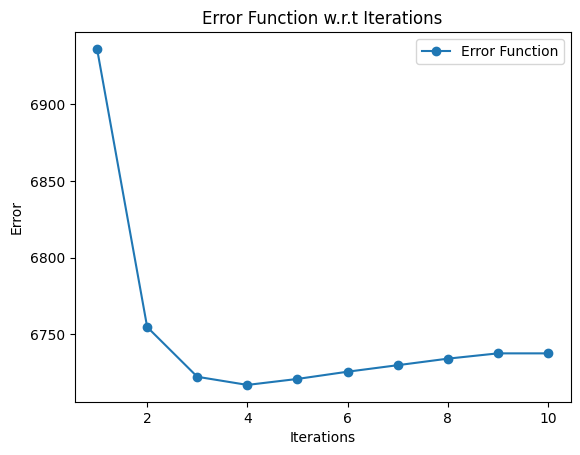

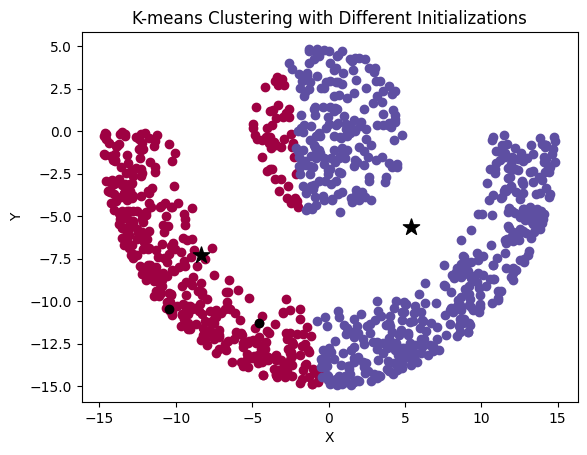

[[-5.926  -9.3515]
 [ 1.388   4.2224]]


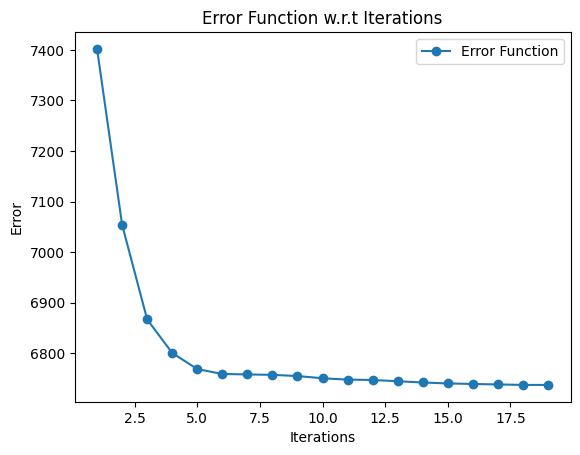

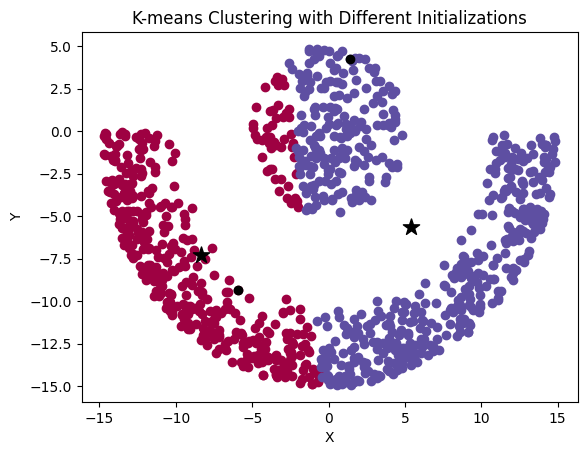

[[ -1.9586   3.377 ]
 [ -6.2257 -12.214 ]]


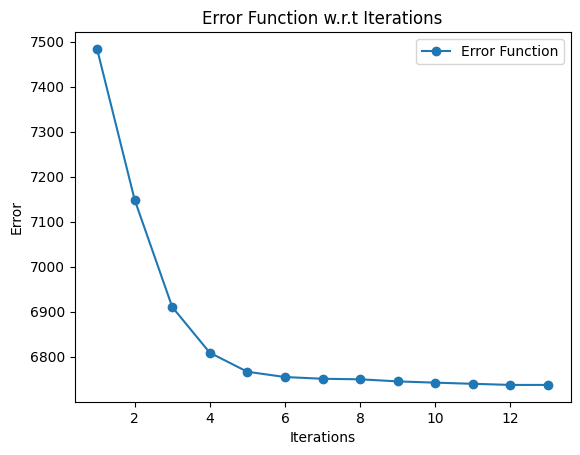

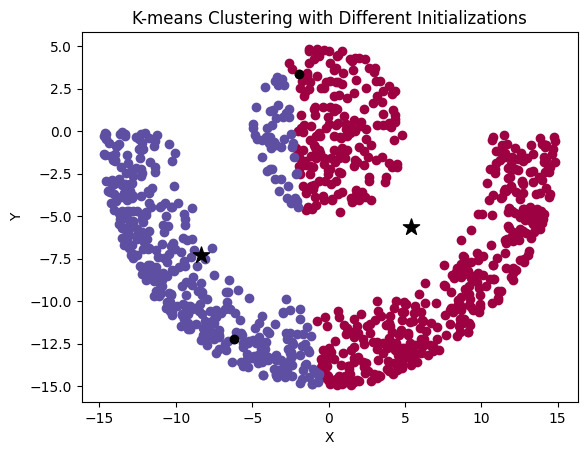

In [3]:
for _ in range(random_initializations):
    centroids = data[np.random.choice(range(len(data)), k, replace=False)]
    print(centroids)
    max_iter = 100
    errors = []
    og_centroids = centroids

    for _ in range(max_iter):
        labels = np.argmin(np.linalg.norm(data[:, None] - centroids, axis=2), axis=1)
        new_centroids = np.array([data[labels == j].mean(axis=0) for j in range(k)])
        error = np.sum(np.linalg.norm(data - new_centroids[labels], axis=1))
        errors.append(error)
        if np.all(new_centroids == centroids):
            break
        centroids = new_centroids

    plt.figure()
    plt.plot(range(1, len(errors) + 1), errors, marker='o', label='Error Function')
    plt.title('Error Function w.r.t Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Error')
    plt.legend()
    plt.show()

    colors = plt.cm.Spectral(np.linspace(0, 1, k))
    for cluster_label, color in zip(range(k), colors):
        cluster_points = data[labels == cluster_label]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=[color], marker='o', label=f'Cluster {cluster_label + 1} - Initialization')

    plt.scatter(og_centroids[:, 0], og_centroids[:, 1], c='black', marker='o', label='init')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='*', s=150, label='mu')

    plt.title('K-means Clustering with Different Initializations')
    plt.xlabel('X')
    plt.ylabel('Y')
    # plt.legend()
    plt.show()